In [1]:
import os
from time import sleep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import IPython.display as ipd
import librosa
import json

# create metadata

In [ ]:
for surat in range(45, 46):
    filenames = []
    for root, dirs, files in os.walk(f"WAV/QS_{surat}"):
        for filename in files:
            if filename.split('.')[-1] == 'wav':
                filenames.append(os.path.join(root, filename))
    tmp = pd.DataFrame()
    tmp['wav_filename'] = filenames
    tmp['wav_filesize'] = tmp.apply(lambda x: os.path.getsize(x.values[0]), axis=1)
    tmp['wav_duration'] = tmp.apply(lambda x: librosa.get_duration(filename=x.values[0]), axis=1)
    tmp['no_surat'] = tmp.apply(lambda x: int(x.values[0].split('/')[-1][:3]), axis=1)
    tmp['no_ayat'] = tmp.apply(lambda x: int(x.values[0].split('/')[-1][3:6]), axis=1)
    tmp['id'] = tmp.apply(lambda x: int(x.values[0].split('/')[-1].split('_')[-1].split('.')[0]), axis=1)
    tmp['wav_filename'] = [i.split('/')[-1] for i in filenames]
    tmp.to_csv(f'WAV/QS_{surat}.csv', index=False)

# download data

audio:
https://everyayah.com/
https://quran.api-docs.io/v4/getting-started/introduction

text:
https://archive.org/details/arabicfullquranversebyverse
http://tanzil.net/docs/download
https://archive.org/details/quranpngs

In [7]:
imams = ['AbdulSamad_64kbps_QuranExplorer.Com',
 'Abdul_Basit_Mujawwad_128kbps',
 'Abdul_Basit_Murattal_192kbps',
 'Abdullaah_3awwaad_Al-Juhaynee_128kbps',
 'Abdullah_Basfar_192kbps',
 'Abdullah_Matroud_128kbps',
 'Abdurrahmaan_As-Sudais_192kbps',
 'Abu_Bakr_Ash-Shaatree_128kbps',
 'Ahmed_Neana_128kbps',
 'Ahmed_ibn_Ali_al-Ajamy_128kbps_ketaballah.net',
 'Akram_AlAlaqimy_128kbps',
 'Alafasy_128kbps',
 'Ali_Hajjaj_AlSuesy_128kbps',
 'Ali_Jaber_64kbps',
 'Ayman_Sowaid_64kbps',
 'Fares_Abbad_64kbps',
 'Ghamadi_40kbps',
 'Hani_Rifai_192kbps',
 'Hudhaify_128kbps',
 'Husary_128kbps',
 'Husary_Muallim_128kbps',
 'Karim_Mansoori_40kbps',
 'Khaalid_Abdullaah_al-Qahtaanee_192kbps',
 'MaherAlMuaiqly128kbps',
 'Minshawy_Murattal_128kbps',
 'Minshawy_Mujawwad_192kbps',
 'Mohammad_al_Tablaway_128kbps',
 'Muhammad_AbdulKareem_128kbps',
 'Muhammad_Ayyoub_128kbps',
 'Muhammad_Jibreel_128kbps',
 'Muhsin_Al_Qasim_192kbps',
 'Mustafa_Ismail_48kbps',
 'Nasser_Alqatami_128kbps',
 'Parhizgar_48kbps',
 'Sahl_Yassin_128kbps',
 'Salaah_AbdulRahman_Bukhatir_128kbps',
 'Salah_Al_Budair_128kbps',
 'Saood_ash-Shuraym_128kbps',
 'Yaser_Salamah_128kbps',
 'Yasser_Ad-Dussary_128kbps',
 'ahmed_ibn_ali_al_ajamy_128kbps',
 'aziz_alili_128kbps',
 'khalefa_al_tunaiji_64kbps',
 'mahmoud_ali_al_banna_32kbps']

len(imams)

44

In [8]:
df_surat = pd.read_csv('nama_surat.csv', header=None)

In [ ]:
download surat
for surat in range(11,16):
    os.system(f'mkdir QS_{surat}')
    max_ayat = df_surat.loc[surat-1,2]
    if surat < 10:
        no_surat = f'00{surat}'
    elif surat < 100:
        no_surat = f'0{surat}'
    elif surat < 1000:
        no_surat = f'{surat}'
    for ayat in range(1,max_ayat+1):
        for i, imam in enumerate(imams):
            if ayat < 10:
                no_ayat = f'00{ayat}'
            elif ayat < 100:
                no_ayat = f'0{ayat}'
            elif ayat < 1000:
                no_ayat = f'{ayat}'             
            cmd = f'wget http://www.everyayah.com/data/{imam}/{no_surat}{no_ayat}.mp3'
            os.system(cmd)
            os.system(f'mv *mp3 QS_{surat}/{no_surat}{no_ayat}_{i}.mp3')
#             os.system('sleep(0.1)')

In [ ]:
# list Imam yang pake ta'awudz di awal surat Al-Fatihah (1)
[43, 33, 31, 21, 13]

In [ ]:
# list Imam yang pake basmallah di awal surat 
[43, 33, 31, 27, 9, 0]

# mp3 to wav conversion

In [ ]:
for surat in range(45,46):
    os.system(f'mkdir WAV/QS_{surat}')
    max_ayat = df_surat.loc[surat-1,2]
    if surat < 10:
        no_surat = f'00{surat}'
    elif surat < 100:
        no_surat = f'0{surat}'
    elif surat < 1000:
        no_surat = f'{surat}'
    for ayat in range(1,max_ayat+1):
        for i, imam in enumerate(imams):
            if ayat < 10:
                no_ayat = f'00{ayat}'
            elif ayat < 100:
                no_ayat = f'0{ayat}'
            elif ayat < 1000:
                no_ayat = f'{ayat}'
            cmd = f'ffmpeg -i QS_{surat}/{no_surat}{no_ayat}_{i}.mp3 -acodec pcm_s16le -ac 1 -ar 16000 WAV/QS_{surat}/{no_surat}{no_ayat}_{i}.wav'
            os.system(cmd)

# quran transcript

In [16]:
with open('ayat.json') as json_file:
    ayat = json.load(json_file)

# data selection

In [2]:
selected_surah = list(range(1,115))

In [3]:
df = pd.DataFrame()
for surah in selected_surah:
    tmp = pd.read_csv(f'WAV/metadata/QS_{surah}.csv')
    df = pd.concat([df, tmp])
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,wav_filename,wav_filesize,wav_duration,no_surat,no_ayat,id
0,001002_23.wav,107912,3.369813,1,2,23
1,001002_37.wav,113046,3.526562,1,2,37
2,001005_16.wav,159820,4.989438,1,5,16
3,001007_8.wav,423228,13.218000,1,7,8
4,001004_42.wav,157230,4.911000,1,4,42


In [5]:
# total size to be loaded (GB)

exclude_imam = [0, 2, 3, 6, 9, 20, 22, 25, 27, 30, 31, 33, 36]
df[df['id'].isin([i for i in range(44) if i not in exclude_imam])]['wav_filesize'].sum() / 1e9

105.485496652

In [9]:
for i in exclude_imam:
    print(imams[i])

AbdulSamad_64kbps_QuranExplorer.Com
Abdul_Basit_Murattal_192kbps
Abdullaah_3awwaad_Al-Juhaynee_128kbps
Abdurrahmaan_As-Sudais_192kbps
Ahmed_ibn_Ali_al-Ajamy_128kbps_ketaballah.net
Husary_Muallim_128kbps
Khaalid_Abdullaah_al-Qahtaanee_192kbps
Minshawy_Mujawwad_192kbps
Muhammad_AbdulKareem_128kbps
Muhsin_Al_Qasim_192kbps
Mustafa_Ismail_48kbps
Parhizgar_48kbps
Salah_Al_Budair_128kbps


In [10]:
# total duration (hours)
df[df['id'].isin([i for i in range(44) if i not in exclude_imam])]['wav_duration'].sum() / 3600

915.3486272395832

In [11]:
df = df[df['id'].isin([i for i in range(44) if i not in exclude_imam])]
df.reset_index(drop=True, inplace=True)

# anomaly detection

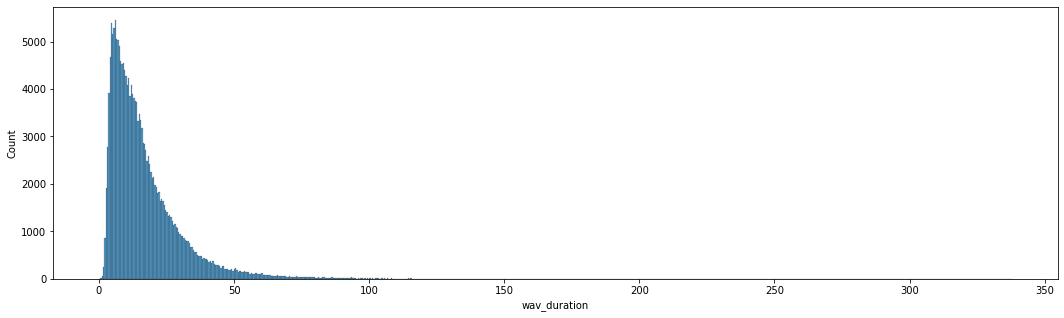

In [12]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(df['wav_duration'], ax=ax);

In [13]:
# df.sort_values('wav_duration', ascending=False).head()

In [17]:
# rasio ukuran file : jumlah karakter
df['ratio'] = df.apply(lambda x: x['wav_filesize']/ len(ayat[f"{x['no_surat']}_{x['no_ayat']}"]), axis=1)
df.head()

,wav_filename,wav_filesize,wav_duration,no_surat,no_ayat,id,ratio
0,001002_23.wav,107912,3.369813,1,2,23,2916.540541
1,001002_37.wav,113046,3.526562,1,2,37,3055.297297
2,001005_16.wav,159820,4.989438,1,5,16,3995.500000
3,001007_8.wav,423228,13.218000,1,7,8,4702.533333
4,001004_42.wav,157230,4.911000,1,4,42,6836.086957


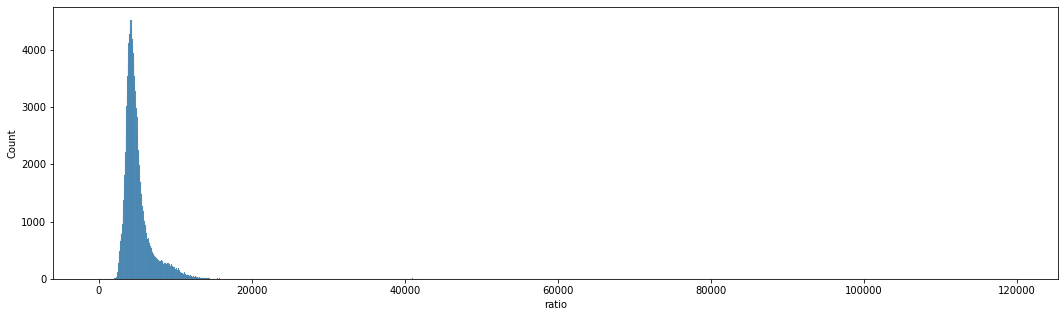

In [18]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(df['ratio'], ax=ax);

In [19]:
median = df['ratio'].median()
std = df['ratio'].std()
print(f'median: {median}')
print(f'std: {std}')

median: 4531.041145490454
std: 3288.06362874373


In [20]:
# check audio > upper threshold

thres_up = median + 4.65*std

tmp = df[(df['ratio']>thres_up)]
tmp = tmp[tmp['no_ayat']!=1]
tmp = tmp.sort_values('ratio', ascending=True)
tmp.reset_index(drop=True, inplace=True)
tmp

,wav_filename,wav_filesize,wav_duration,no_surat,no_ayat,id,ratio
0,027036_21.wav,2991096,93.466125,27,36,21,19940.640000
1,063011_40.wav,1841396,57.535750,63,11,40,20235.120879
2,056022_1.wav,265218,8.280812,56,22,1,20401.384615
3,050025_14.wav,821104,25.656000,50,25,14,21053.948718
4,037067_7.wav,1179652,36.858812,37,67,7,22685.615385
5,089028_32.wav,1078586,33.698000,89,28,32,22948.638298
6,055064_21.wav,444890,13.897187,55,64,21,27805.625000
7,042002_17.wav,177406,5.538000,42,2,17,29567.666667
8,034026_5.wav,2988648,93.387812,34,26,5,30496.408163
9,042002_5.wav,184146,5.747000,42,2,5,30691.000000


In [21]:
def check_audio(i, tmp):
    file = tmp.iloc[i,0]
    nsurat = tmp.iloc[i,3]
    nayat = tmp.iloc[i,4]
    id_ = tmp.iloc[i,5]

    key = f"{tmp.loc[i,'no_surat']}_{tmp.loc[i,'no_ayat']}"
    print(ayat[key])

    if nsurat < 10:
        no_surat = f'00{nsurat}'
    elif nsurat < 100:
        no_surat = f'0{nsurat}'
    elif nsurat < 1000:
        no_surat = f'{nsurat}'
    if nayat < 10:
        no_ayat = f'00{nayat}'
    elif nayat < 100:
        no_ayat = f'0{nayat}'
    elif nayat < 1000:
        no_ayat = f'{nayat}'

    cmd = f'wget -O tmp.mp3 http://www.everyayah.com/data/{imams[id_]}/{no_surat}{no_ayat}.mp3'
    os.system(cmd)

In [27]:
check_audio(10, tmp)
ipd.Audio(filename='tmp.mp3')

فَمَا ظَنُّكُم بِرَبِّ ٱلْعَٰلَمِينَ


In [28]:
# check audio < lower threshold

thres_dw = median - 0.7*std

tmp = df[(df['ratio']<thres_dw)]
tmp = tmp[tmp['no_ayat']!=1]
tmp = tmp.sort_values('ratio', ascending=False)
tmp.reset_index(drop=True, inplace=True)
tmp

,wav_filename,wav_filesize,wav_duration,no_surat,no_ayat,id,ratio
0,086002_37.wav,71250,2.220438,86,2,37,2226.562500
1,035019_37.wav,88804,2.769000,35,19,37,2220.100000
2,024049_37.wav,133108,4.153500,24,49,37,2218.466667
3,004131_41.wav,581190,18.155125,4,131,41,2218.282443
4,004017_41.wav,408154,12.747750,4,17,41,2218.228261
5,026198_23.wav,106240,3.317563,26,198,23,2213.333333
6,020026_37.wav,48680,1.515125,20,26,37,2212.727273
7,020027_37.wav,72922,2.272687,20,27,37,2209.757576
8,002166_23.wav,262556,8.202438,2,166,23,2206.352941
9,024056_37.wav,209176,6.530625,24,56,37,2201.852632


In [35]:
check_audio(40, tmp)
ipd.Audio(filename='tmp.mp3')

وَإِذْ قَالَ مُوسَىٰ لِقَوْمِهِ ٱذْكُرُوا۟ نِعْمَةَ ٱللَّهِ عَلَيْكُمْ إِذْ أَنجَىٰكُم مِّنْ ءَالِ فِرْعَوْنَ يَسُومُونَكُمْ سُوٓءَ ٱلْعَذَابِ وَيُذَبِّحُونَ أَبْنَآءَكُمْ وَيَسْتَحْيُونَ نِسَآءَكُمْ وَفِى ذَٰلِكُم بَلَآءٌ مِّن رَّبِّكُمْ عَظِيمٌ


# generate data set for training

In [ ]:
# choose random imams
# unique_user = range(44)
# imam_tr = np.random.choice(unique_user, 31, replace=False)
# imam_val = np.random.choice([i for i in unique_user if i not in imam_tr], 9, replace=False)
# imam_ts = [i for i in unique_user if i not in list(imam_tr) + list(imam_val)]

In [ ]:
# all
# imam_tr = [ 0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 19, 20, 21, 22, 23, 25,
#            26, 27, 28, 29, 32, 33, 36, 38, 39, 40, 41, 42, 43]
# imam_val = [5, 12, 17, 18, 24, 31, 34, 35, 37]
# imam_ts = [8, 14, 30]

# selected imam

imam_tr = [i for i in [ 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 25,
           26, 27, 28, 29, 32, 33, 36, 38, 39, 40, 41, 42, 43] if i not in exclude_imam]
imam_val = [i for i in [23, 24, 31, 34, 35, 37] if i not in exclude_imam]
imam_ts = [i for i in [8, 14, 30] if i not in exclude_imam]

In [ ]:
# exclude long audio
filter_ = (df['ratio'] < thres_up) & (df['ratio'] > thres_dw) & (df['wav_duration'] < 60) #| (df['no_ayat']==1)

In [ ]:
# create train data set
filter_tr = df['id'].isin(imam_tr)
train = df[(filter_tr & filter_)][['wav_filename', 'wav_filesize']]
train['wav_filename'] = df.apply(lambda x: f"/content/DeepSpeech/wav/QS_{x['no_surat']}/{x['wav_filename']}", axis=1)
train['transcript'] = df[(filter_tr & filter_)].apply(lambda x: ayat[f"{x['no_surat']}_{x['no_ayat']}"], axis=1)

In [ ]:
train.head()

In [ ]:
# create validation data set
filter_val = df['id'].isin(imam_val)
valid = df[(filter_val & filter_)][['wav_filename', 'wav_filesize']]
valid['wav_filename'] = df.apply(lambda x: f"/content/DeepSpeech/wav/QS_{x['no_surat']}/{x['wav_filename']}", axis=1)
valid['transcript'] = df[(filter_val & filter_)].apply(lambda x: ayat[f"{x['no_surat']}_{x['no_ayat']}"], axis=1)

In [ ]:
valid.head()

In [ ]:
# create test data set
filter_ts = df['id'].isin(imam_ts)
test = df[(filter_ts & filter_)][['wav_filename', 'wav_filesize']]
test['wav_filename'] = df.apply(lambda x: f"/content/DeepSpeech/wav/QS_{x['no_surat']}/{x['wav_filename']}", axis=1)
test['transcript'] = df[(filter_ts & filter_)].apply(lambda x: ayat[f"{x['no_surat']}_{x['no_ayat']}"], axis=1)

In [ ]:
# check NaN
train.isna().sum()

In [ ]:
# number of steps
batch = 32
len(train)//batch, len(valid)//batch, len(test)//batch

In [ ]:
# duration (hours)
df[(filter_tr & filter_)]['wav_duration'].sum() / 3600, df[(filter_val & filter_)]['wav_duration'].sum() / 3600, df[(filter_ts & filter_)]['wav_duration'].sum() / 3600

In [ ]:
len(train), len(valid), len(test)

In [ ]:
train.to_csv('data/train-E.csv', index=False)
valid.to_csv('data/dev-E.csv', index=False)
test.to_csv('data/test-E.csv', index=False)

# train model

In [ ]:
# python3 -u DeepSpeech.py \
#   --train_files "data_csv/train.csv" \
#   --dev_files "data_csv/dev.csv" \
#   --test_files "data_csv/test.csv" \
#   --alphabet_config_path "data_csv/quran-alphabets.txt" \
#   --scorer "data_csv/quran.scorer" \
#   --export_dir "model" \
#   --train_batch_size 32 \
#   --dev_batch_size 1 \
#   --test_batch_size 1 \
#   --use_allow_growth True \
#   --epochs 50 \
#   --early_stop False \
#   --export_language "ar" \
#   --export_tflite True \
#   --n_hidden 1024 \
#   --dropout_rate 0.12 \
#   --learning_rate 0.01 \
#   --checkpoint_dir "checkpoints" \
#   --max_to_keep 10 \
#   --summary_dir "summary"

In [ ]:
# train = pd.read_csv('train-Fatihah.csv')
# train['wav_filename'] = train['wav_filename'].apply(lambda x: f"/mydrive/PyRuhr/Quran/all/{x.split('/')[-1]}")

# dev = pd.read_csv('dev-Fatihah.csv')
# dev['wav_filename'] = dev['wav_filename'].apply(lambda x: f"/mydrive/PyRuhr/Quran/all/{x.split('/')[-1]}")

# test = pd.read_csv('test-Fatihah.csv')
# test['wav_filename'] = test['wav_filename'].apply(lambda x: f"/mydrive/PyRuhr/Quran/all/{x.split('/')[-1]}")

# train.to_csv('train-Fatihah.csv', index=False)
# dev.to_csv('dev-Fatihah.csv', index=False)
# test.to_csv('test-Fatihah.csv', index=False)